In [1]:
#before proceeding you should run these in your python: 
#---------------------------------------------------------------------------------------------------
# pip install openmeteo-requests 
# pip install requests-cache retry-requests numpy pandas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import os
import numpy as np
import json
import requests
from pprint import pprint
from retry_requests import retry
import requests_cache
import openmeteo_requests

In [3]:
with open('descriptions.json', 'r') as f:
    data = json.load(f)
# Accessing data
code = ['weather_code']

#data[code]['day']["description"]
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 39.0376,
	"longitude": -77.4158,
	"start_date": "2000-01-01",
	"end_date": "2008-12-31",
	"hourly": ["temperature_2m", "relative_humidity_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m"],
	"daily": "weather_code",
	"temperature_unit": "fahrenheit",
	"wind_speed_unit": "mph",
	"precipitation_unit": "inch",
	"timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(2).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(3).ValuesAsNumpy()
hourly_rain = hourly.Variables(4).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(5).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(6).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(14).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(18).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code.astype(int)
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
#print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code

daily_dataframe = pd.DataFrame(data = daily_data)
hourly_dataframe.head()

Coordinates 39.05096435546875°N -77.40740966796875°E
Elevation 101.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s


,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2000-01-01 04:00:00+00:00,36.844700,84.508644,31.711010,0.0,0.0,0.0,0.0,0,1022.900024,1010.199524,0.0,0.0,0.0,0.0,3.325540,4.161060,250.346085,216.253922,3.8029
1,2000-01-01 05:00:00+00:00,36.214699,84.774651,30.907288,0.0,0.0,0.0,0.0,0,1022.799988,1010.084900,0.0,0.0,0.0,0.0,3.537008,4.803042,251.564957,207.758453,3.8029
2,2000-01-01 06:00:00+00:00,36.034698,84.456161,30.554066,0.0,0.0,0.0,0.0,0,1023.000000,1010.277649,0.0,0.0,0.0,0.0,3.848680,6.085298,234.462234,197.102814,4.6977
3,2000-01-01 07:00:00+00:00,32.704700,90.322327,26.706497,0.0,0.0,0.0,0.0,0,1022.700012,1009.896057,0.0,0.0,0.0,0.0,4.501876,8.325127,206.564987,186.170074,6.9347
4,2000-01-01 08:00:00+00:00,30.364700,93.612801,24.137669,0.0,0.0,0.0,0.0,0,1023.099976,1010.230469,0.0,0.0,0.0,0.0,4.562603,10.997762,191.309891,184.666779,7.3821


In [4]:
#This will change the weather code in (hourly_dataframe, cell above this) with what the weather actually was. Then condense the file to have fewer columns. 
#This will take approximately 5:30 seconds to complete. I saved it to a CSV file so that i don't need to run it every time.
#----------------------------------------------------------------------------------------------------------------------------------------------------------
clean_data = hourly_dataframe.rename(columns={'date': "Date", 'relative_humidity_2m':"Relative Humidity", 'wind_speed_100m': "Wind Speed at 100m",'wind_speed_10m': "Wind Speed at 10m",'wind_gusts_10m': "Wind Gusts at 10m",'apparent_temperature':"Temperature",'precipitation': "Precipitation",'rain':"Rain Fall",'snowfall': "Snow Fall",'snow_depth':"Amount of Snow",'weather_code':"Weather"})
#clean_data = clean_data[['Date','Temperature','Precipitation', 'Rain Fall', 'Snow Fall', 'Amount of Snow', 'Weather']]
clean_data = pd.DataFrame(clean_data)


def weather(code):
    with open('descriptions.json', 'r') as f:
        data = json.load(f)
    code = f"{code}"
    data=data[code]['day']["description"]
    return data
for code in clean_data['Weather']:
    data = weather(code)
    clean_data['Weather'] = clean_data['Weather'].replace(to_replace=code, value=data, regex=True)

clean_data
clean_data.to_csv('weather_by_hour.csv') 

In [6]:
#code for the (airline_2000_2008_iad_origin.csv)
#---------------------------------------------------------------------------------------------------------------------------------------------


#(df of your choice).to_csv('airlines_2000_2008_iad_origin.csv') 

In [5]:
#this is saved CSV to avoid the extended execution of cells.
#------------------------------------------------------------------------------
airline_df = Path('airlines_2000_2008_iad_origin.csv')

weather_df = Path('weather_by_hour.csv')


airline_df = pd.read_csv(airline_df)

weather_df = pd.read_csv(weather_df)


In [6]:
#code changes the value in the "Month", "Year", 'DayofMonth' and the Departure time to an integer to get the formatting of (2009-01-01 03:00:00+00:00)
#this will take approximately 40 seconds to complete.
#--------------------------------------------------------------------------------------------------------------------------------------------------

conair_df = airline_df[["Month", "Year", 'DayofMonth']].astype(int)
dep_df = airline_df['DepTime'].round(-2)

dep_df = pd.DataFrame(dep_df)

conair_df['Departure'] = dep_df['DepTime']
conair_df = conair_df.fillna(0)
conair_df['Departure'] = conair_df["Departure"].astype(int)
i = 0
airline_date = []
for index, row in conair_df.iterrows():
 
    i = i + 1
    month = row["Month"]
    day = row["DayofMonth"]
    year = row["Year"]
    time = row["Departure"]/100
    if month < 10:
        month = f'0{month}'
    if day < 10:
        day = f'0{day}'
    if time < 10:
        time = f'0{int(time)}'
    else:
        time = f'{int(time)}'
    airline_date.append(f'{year}-{month}-{day} {time}:00:00+00:00')    
    #if i == 15:
        #break  
    

airline_df.insert(2, "Date", airline_date, True)

airline_df.head()
airline_df.to_csv('date_format.csv') 

In [37]:
#This brings in the complete.csv file then merges it with the updated weather codes to officially generating the final draft of the dataframe/csv file
#This will take about 15 seconds to complete
#----------------------------------------------------------------------------------------------------
complete_df = Path('date_format.csv')
complete_df = pd.read_csv(complete_df)

complete_df = complete_df.merge(weather_df, how='left', on='Date')
complete_df
complete_df = complete_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
complete_df.to_csv('final_df.csv') 

In [39]:
#Optional replaces the Cancellation Code with the reason.
#-------------------------------------------------------------

# complete_df = complete_df[['Date', 'CancellationCode', 'Cancelled', 'Dest','Temperature', 'Rain Fall', 'Snow Fall', 'Amount of Snow', 'Weather', "Wind Speed at 100m", "Wind Speed at 10m","Wind Gusts at 10m"]]
complete_df.loc[complete_df["CancellationCode"] == "A", "CancellationCode"] = 'Carrier Caused'
complete_df.loc[complete_df["CancellationCode"] == "B", "CancellationCode"] = 'Weather'
complete_df.loc[complete_df["CancellationCode"] == "C", "CancellationCode"] = 'National Aviation System'
complete_df.loc[complete_df["CancellationCode"] == "D", "CancellationCode"] = 'Security'
# complete_df = complete_df.fillna('No Cancellation')
complete_df.to_csv('final_df.csv') 


In [42]:
#creating a dataframe for each year.
#---------------------------------------------------------------------------------------------------
year_2000 = complete_df.loc[(complete_df["Year"] == 2000)]
year_2001 = complete_df.loc[(complete_df["Year"] == 2001)]
year_2002 = complete_df.loc[(complete_df["Year"] == 2002)]
year_2003 = complete_df.loc[(complete_df["Year"] == 2003)]
year_2004 = complete_df.loc[(complete_df["Year"] == 2004)]
year_2005 = complete_df.loc[(complete_df["Year"] == 2005)]
year_2006 = complete_df.loc[(complete_df["Year"] == 2006)]
year_2007 = complete_df.loc[(complete_df["Year"] == 2007)]
year_2008 = complete_df.loc[(complete_df["Year"] == 2008)]



In [53]:
x_axis = np.arange(12)
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

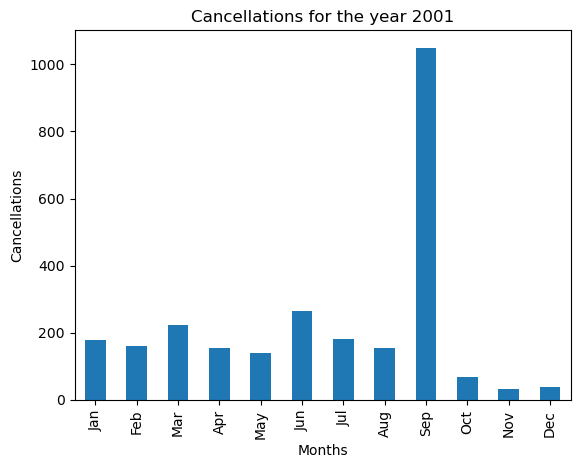

In [43]:
#Defined Function for bar graphs using dataframes.
#------------------------------------------------------------------------------------------------
def cancel(years):
    year = years["Year"].max()
    x_can = years.loc[(years['Cancelled'] == 1)]
    y_mon = x_can.groupby(['Month'])['Cancelled'].value_counts()
    y_mon = pd.DataFrame(y_mon)
    
    y_mon.plot.bar(color='tab:blue', legend=False)
    plt.xlabel("Months")
    plt.ylabel("Cancellations")
    x_axis = np.arange(12)
    
    plt.title(f"Cancellations for the year {year}")
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()
    return

cancel(year_2001)

In [44]:
def compare(years):
    year = years["Cancellations"].max()
    x_can = years.loc[(years['Cancelled'] == 1)]
    y_mon = x_can.groupby(['Month'])['Cancelled'].value_counts()
    y_mon = pd.DataFrame(y_mon)
    
    y_mon.plot.bar(color='tab:blue', legend=False)
    plt.xlabel("Months")
    plt.ylabel("Cancellations")
    x_axis = np.arange(12)
    
    plt.title(f"Cancellations for the year {year}")
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()
    return

In [17]:
# importing package 
import matplotlib.pyplot as plt 
import numpy as np 

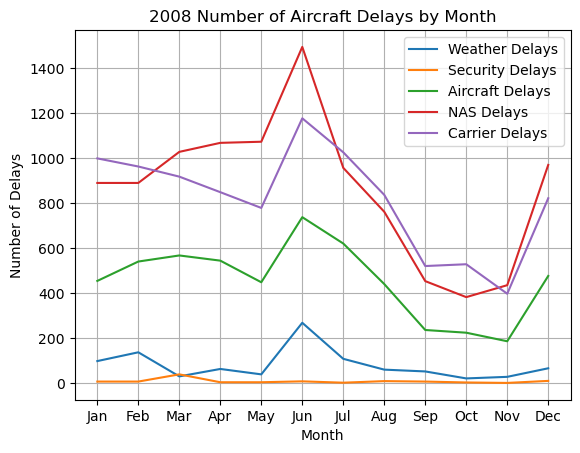

In [266]:
# Build Line Graphs showing number of delays over month

year_2008_delay_df = year_2008[year_2008['WeatherDelay'] > 0]
# year_2008_all_delay_df = year_2008[year_2008['LateAircraftDelay'] == 0]

year_2008_security_delay_df = year_2008[(year_2008['WeatherDelay'] == 0) & 
                                    (year_2008['SecurityDelay'] > 0)]

year_2008_aircraft_delay_df = year_2008[(year_2008['WeatherDelay'] == 0) & 
                                    (year_2008['LateAircraftDelay'] > 0)]

year_2008_nas_delay_df = year_2008[(year_2008['WeatherDelay'] == 0) & 
                                    (year_2008['NASDelay'] > 0)]

year_2008_carrier_delay_df = year_2008[(year_2008['WeatherDelay'] == 0) & 
                                    (year_2008['CarrierDelay'] > 0)]


mon_weather_delay_counts = year_2008_delay_df.groupby(['Month'])['DayofMonth'].count()
mon_weather_delay_counts = pd.DataFrame(mon_weather_delay_counts)

mon_security_counts = year_2008_security_delay_df.groupby(['Month'])['DayofMonth'].count()
mon_security_counts = pd.DataFrame(mon_security_counts)

mon_aircraft_delay_counts = year_2008_aircraft_delay_df.groupby(['Month'])['DayofMonth'].count()
mon_aircraft_delay_counts = pd.DataFrame(mon_aircraft_delay_counts)

mon_nas_delay_counts = year_2008_nas_delay_df.groupby(['Month'])['DayofMonth'].count()
mon_nas_delay_counts = pd.DataFrame(mon_nas_delay_counts)

mon_carrier_delay_counts = year_2008_carrier_delay_df.groupby(['Month'])['DayofMonth'].count()
mon_carrier_delay_counts = pd.DataFrame(mon_carrier_delay_counts)


x_axis = np.arange(12)
tick_locations = [x for x in x_axis]

plt.plot(x_axis, mon_weather_delay_counts, label='Weather Delays')
plt.plot(x_axis, mon_security_counts, label='Security Delays')
plt.plot(x_axis, mon_aircraft_delay_counts, label='Aircraft Delays')
plt.plot(x_axis, mon_nas_delay_counts, label='NAS Delays')
plt.plot(x_axis, mon_carrier_delay_counts, label='Carrier Delays')

plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title('2008 Number of Aircraft Delays by Month')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.legend()
plt.grid(True)
plt.savefig('2008 Number of Aircraft Delays by Month')
plt.show()


In [155]:
# Build Line Graphs showing number of delays over month
def GenerateMonthlyDelaysByYearLineGraphs(year_df):
    
    year = year_df.Year.max()
    
    year_xxxx_delay_df = year_df[(year_df['WeatherDelay'] > 0)]

    year_xxxx_all_delay_df = year_df[(year_df['WeatherDelay'] == 0) & (year_df['NASDelay'] == 0)]

    

    mon_weather_delay_counts = year_xxxx_delay_df.groupby(['Month'])['DayofMonth'].count()
    mon_weather_delay_counts = pd.DataFrame(mon_weather_delay_counts)
    # print(mon_weather_delay_counts)

    mon_all_delay_counts = year_xxxx_all_delay_df.groupby(['Month'])['DayofMonth'].count()
    mon_all_delay_counts = pd.DataFrame(mon_all_delay_counts)
    

    x_axis = np.arange(12)
    tick_locations = [x for x in x_axis]

    plt.plot(x_axis, mon_weather_delay_counts)
    plt.fill_between(x_axis, mon_weather_delay_counts['DayofMonth'])


    plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.grid(True)
    fig_title = f'{year} Weather Delays by Month'
    plt.title(fig_title)
    plt.xlabel('Month')
    plt.ylabel('Number of Delays')
    plt.savefig(fig_title)
    plt.show()

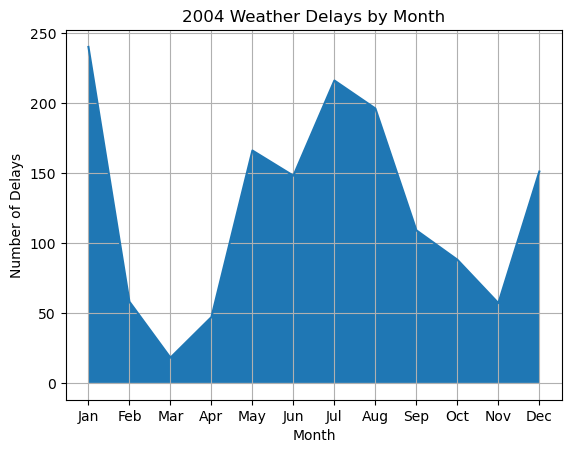

In [156]:
GenerateMonthlyDelaysByYearLineGraphs(year_2004)

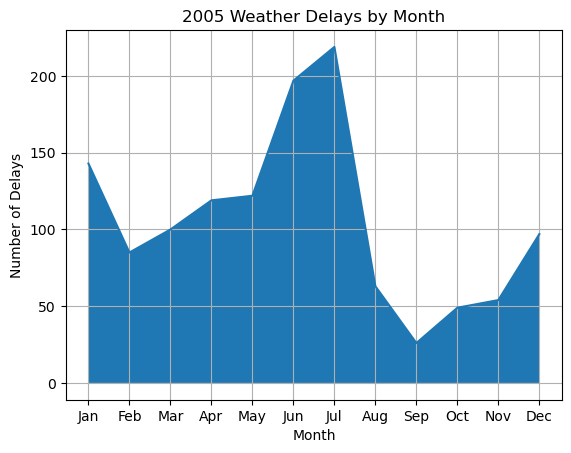

In [157]:
GenerateMonthlyDelaysByYearLineGraphs(year_2005)

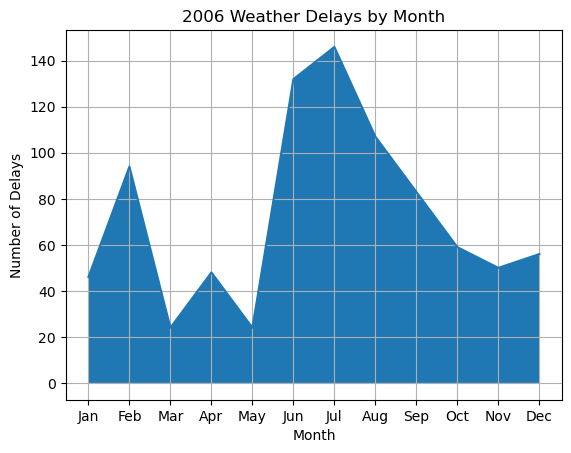

In [158]:
GenerateMonthlyDelaysByYearLineGraphs(year_2006)

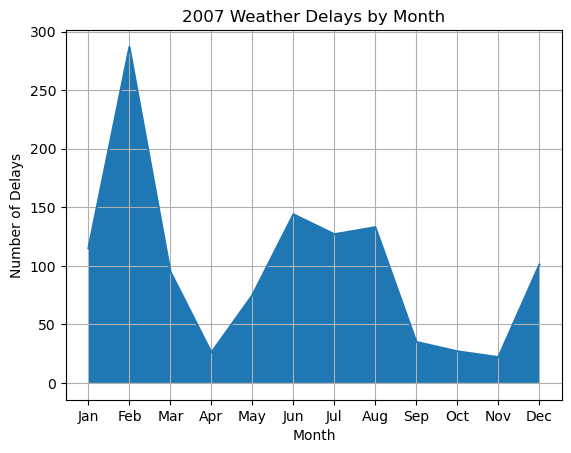

In [159]:
GenerateMonthlyDelaysByYearLineGraphs(year_2007)

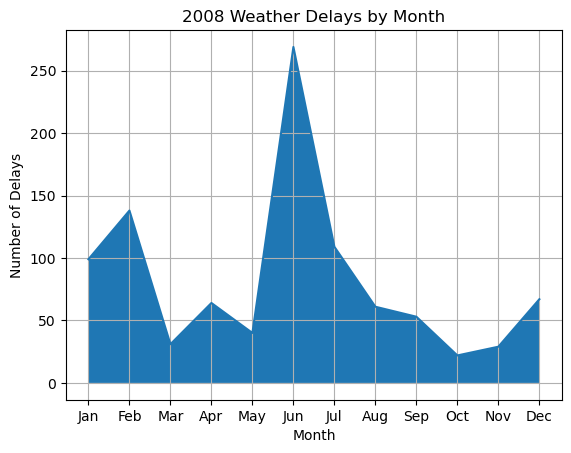

In [160]:
GenerateMonthlyDelaysByYearLineGraphs(year_2008)

In [195]:
fx_df = year_2008[year_2008['WeatherDelay'] > 0]

print('100m max',fx_df['Wind Speed at 100m'].max())
print('100m min',fx_df['Wind Speed at 100m'].min())

print('10m max',fx_df['Wind Speed at 10m'].max())
print('10m min',fx_df['Wind Speed at 10m'].min())

print('10m Wind Gusts max',fx_df['Wind Gusts at 10m'].max())
print('10m Wind Gusts min',fx_df['Wind Gusts at 10m'].min())


100m max 34.96668
100m min 0.8065618
10m max 22.317368
10m min 0.50020844
10m Wind Gusts max 52.7932
10m Wind Gusts min 2.6844


In [209]:
# bin up the wind speeds
bins=[0,5,10,15,20,25,30,35,40,45,50,55]
group_labels = ['0 to 4.9','5 to 9.9', '10 to 14.9','15 to 19.9', '20 to 24.9', '25 to 29.9' ,'30 to 34.9' ,'35 to 39.9', '40 to 44.9', '45 to 49.9', '50 to 55']

bin_2008_df = year_2008

bin_2008_df['Wind Speed at 10m Group'] = pd.cut(bin_2008_df['Wind Speed at 10m'], bins, labels=group_labels)
bin_2008_df['Wind Speed at 100m Group'] = pd.cut(bin_2008_df['Wind Speed at 100m'], bins, labels=group_labels)
bin_2008_df['Wind Gusts at 10m Group'] = pd.cut(bin_2008_df['Wind Gusts at 10m'], bins, labels=group_labels)

bin_2008_df.head()


,ActualElapsedTime,AirTime,Date,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,cloud_cover_mid,cloud_cover_high,Wind Speed at 10m,Wind Speed at 100m,wind_direction_10m,wind_direction_100m,Wind Gusts at 10m,Wind Speed at 10m Group,Wind Speed at 100m Group,Wind Gusts at 10m Group
2,324.0,299.0,2008-10-01 17:00:00+00:00,-24.0,1957.0,2021,1736,345.0,NaN,0,...,97.0,0.0,4.787389,6.847559,307.40543,308.36752,20.1330,0 to 4.9,5 to 9.9,20 to 24.9
5,161.0,140.0,2008-05-29 08:00:00+00:00,-16.0,1014.0,1030,843,167.0,NaN,0,...,0.0,0.0,4.839371,11.169330,236.30990,237.26477,8.5006,0 to 4.9,10 to 14.9,5 to 9.9
25,353.0,315.0,2008-07-22 08:00:00+00:00,17.0,1123.0,1106,825,341.0,NaN,0,...,15.0,3.0,3.202896,7.214108,294.77512,299.74478,6.0399,0 to 4.9,5 to 9.9,5 to 9.9
47,57.0,42.0,2008-08-27 14:00:00+00:00,-39.0,1518.0,1557,1425,92.0,NaN,0,...,45.0,100.0,7.436132,10.841952,111.16133,111.80147,18.3434,5 to 9.9,10 to 14.9,15 to 19.9
68,55.0,35.0,2008-01-05 10:00:00+00:00,77.0,1110.0,953,850,63.0,NaN,0,...,0.0,52.0,1.803527,5.415204,187.12492,218.29020,7.6058,0 to 4.9,5 to 9.9,5 to 9.9


In [222]:
bin_2008_delay_df = bin_2008_df[bin_2008_df['WeatherDelay'] > 0]
bin_2008_delay_df

,ActualElapsedTime,AirTime,Date,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,...,cloud_cover_mid,cloud_cover_high,Wind Speed at 10m,Wind Speed at 100m,wind_direction_10m,wind_direction_100m,Wind Gusts at 10m,Wind Speed at 10m Group,Wind Speed at 100m Group,Wind Gusts at 10m Group
430,87.0,48.0,2008-08-02 09:00:00+00:00,37.0,1024.0,947,830,77.0,NaN,0,...,11.0,16.0,3.641572,8.423723,280.61960,280.71307,7.829500,0 to 4.9,5 to 9.9,5 to 9.9
1480,90.0,62.0,2008-11-09 18:00:00+00:00,46.0,1930.0,1844,1705,99.0,NaN,0,...,99.0,0.0,6.521920,9.461742,264.09396,263.21112,21.475200,5 to 9.9,5 to 9.9,20 to 24.9
2298,349.0,325.0,2008-12-06 19:00:00+00:00,74.0,2200.0,2046,1751,355.0,NaN,0,...,100.0,100.0,7.609089,11.408700,178.31535,180.00000,18.790798,5 to 9.9,10 to 14.9,15 to 19.9
2942,163.0,97.0,2008-01-17 15:00:00+00:00,62.0,1821.0,1719,1526,113.0,NaN,0,...,100.0,100.0,6.762996,10.551908,145.78424,147.99466,14.987900,5 to 9.9,10 to 14.9,10 to 14.9
3705,169.0,97.0,2008-06-19 17:00:00+00:00,45.0,1924.0,1839,1713,146.0,NaN,0,...,71.0,0.0,2.702977,3.702894,294.44394,295.01685,15.882700,0 to 4.9,0 to 4.9,15 to 19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783754,206.0,124.0,2008-06-13 18:00:00+00:00,76.0,2026.0,1910,1724,166.0,NaN,0,...,1.0,1.0,6.362683,8.686936,190.12460,191.88864,18.790798,5 to 9.9,5 to 9.9,15 to 19.9
783806,113.0,34.0,2008-05-31 13:00:00+00:00,53.0,1513.0,1420,1318,62.0,NaN,0,...,21.0,98.0,10.406259,16.107954,205.46330,207.27667,26.620298,10 to 14.9,15 to 19.9,25 to 29.9
785929,86.0,67.0,2008-09-09 21:00:00+00:00,211.0,2226.0,1855,1720,95.0,NaN,0,...,82.0,100.0,1.803527,3.325540,262.87510,250.34608,11.408700,0 to 4.9,0 to 4.9,10 to 14.9
786171,126.0,109.0,2008-12-23 21:00:00+00:00,176.0,2326.0,2030,1810,140.0,NaN,0,...,55.0,93.0,7.546353,12.687951,168.02390,170.86990,20.133000,5 to 9.9,10 to 14.9,20 to 24.9


In [223]:

delay_wind_10m_group = bin_2008_delay_df.groupby(['Wind Speed at 10m Group'])
delay_wind_100m_group = bin_2008_delay_df.groupby('Wind Speed at 100m Group')
delay_wind_gust_10m_group = bin_2008_delay_df.groupby('Wind Gusts at 10m Group')

print(delay_wind_10m_group['Wind Speed at 10m Group'].count())
print('-----------------')
print(delay_wind_100m_group['Wind Speed at 100m Group'].count())
print('-----------------')
print(delay_wind_gust_10m_group['Wind Gusts at 10m Group'].count())


Wind Speed at 10m Group
0 to 4.9      386
5 to 9.9      503
10 to 14.9     71
15 to 19.9     14
20 to 24.9      5
25 to 29.9      0
30 to 34.9      0
35 to 39.9      0
40 to 44.9      0
45 to 49.9      0
50 to 55        0
Name: Wind Speed at 10m Group, dtype: int64
-----------------
Wind Speed at 100m Group
0 to 4.9      174
5 to 9.9      384
10 to 14.9    323
15 to 19.9     65
20 to 24.9     16
25 to 29.9     12
30 to 34.9      5
35 to 39.9      0
40 to 44.9      0
45 to 49.9      0
50 to 55        0
Name: Wind Speed at 100m Group, dtype: int64
-----------------
Wind Gusts at 10m Group
0 to 4.9       11
5 to 9.9       85
10 to 14.9    284
15 to 19.9    277
20 to 24.9    146
25 to 29.9    112
30 to 34.9     38
35 to 39.9     13
40 to 44.9      4
45 to 49.9      5
50 to 55        4
Name: Wind Gusts at 10m Group, dtype: int64


In [224]:
bin_2008_nondelay_df = bin_2008_df[bin_2008_df['WeatherDelay'] == 0]

nondelay_wind_10m_group = bin_2008_nondelay_df.groupby(['Wind Speed at 10m Group'])
nondelay_wind_100m_group = bin_2008_nondelay_df.groupby('Wind Speed at 100m Group')
nondelay_wind_gust_10m_group = bin_2008_nondelay_df.groupby('Wind Gusts at 10m Group')

print(nondelay_wind_10m_group['Wind Speed at 10m Group'].count())
print('-----------------')
print(nondelay_wind_100m_group['Wind Speed at 100m Group'].count())
print('-----------------')
print(nondelay_wind_gust_10m_group['Wind Gusts at 10m Group'].count())

Wind Speed at 10m Group
0 to 4.9      7590
5 to 9.9      8771
10 to 14.9    2368
15 to 19.9     499
20 to 24.9      21
25 to 29.9       0
30 to 34.9       0
35 to 39.9       0
40 to 44.9       0
45 to 49.9       0
50 to 55         0
Name: Wind Speed at 10m Group, dtype: int64
-----------------
Wind Speed at 100m Group
0 to 4.9      3117
5 to 9.9      6535
10 to 14.9    5599
15 to 19.9    2541
20 to 24.9    1017
25 to 29.9     340
30 to 34.9      94
35 to 39.9       3
40 to 44.9       0
45 to 49.9       0
50 to 55         0
Name: Wind Speed at 100m Group, dtype: int64
-----------------
Wind Gusts at 10m Group
0 to 4.9       294
5 to 9.9      3045
10 to 14.9    5277
15 to 19.9    4388
20 to 24.9    2761
25 to 29.9    1802
30 to 34.9     898
35 to 39.9     462
40 to 44.9     210
45 to 49.9      91
50 to 55        20
Name: Wind Gusts at 10m Group, dtype: int64


In [248]:
# Create dataframe to collect Add Percent to delay_wind_10m_group
delay_wind_10m_group_plot = pd.DataFrame(delay_wind_10m_group['Wind Speed at 10m'].count())
delay_wind_10m_group_plot = delay_wind_10m_group_plot.reset_index()
delay_wind_10m_group_plot['Percent'] = 0

for index, row in delay_wind_10m_group_plot.iterrows():
    delay_wind_10m_group_plot.loc[index, 'Percent'] = round(row['Wind Speed at 10m'] / len(delay_wind_10m_group_plot), 2)

delay_wind_10m_group_plot

,Wind Speed at 10m Group,Wind Speed at 10m,Percent
0,0 to 4.9,386,35.09
1,5 to 9.9,503,45.73
2,10 to 14.9,71,6.45
3,15 to 19.9,14,1.27
4,20 to 24.9,5,0.45
5,25 to 29.9,0,0.00
6,30 to 34.9,0,0.00
7,35 to 39.9,0,0.00
8,40 to 44.9,0,0.00
9,45 to 49.9,0,0.00


In [250]:
# Create dataframe to collect Add Percent to delay_wind_100m_group
delay_wind_100m_group_plot = pd.DataFrame(delay_wind_100m_group['Wind Speed at 100m'].count())
delay_wind_100m_group_plot = delay_wind_100m_group_plot.reset_index()
delay_wind_100m_group_plot['Percent'] = 0

for index, row in delay_wind_100m_group_plot.iterrows():
    delay_wind_100m_group_plot.loc[index, 'Percent'] = round(row['Wind Speed at 100m'] / len(delay_wind_100m_group_plot), 2)

delay_wind_100m_group_plot

,Wind Speed at 100m Group,Wind Speed at 100m,Percent
0,0 to 4.9,174,15.82
1,5 to 9.9,384,34.91
2,10 to 14.9,323,29.36
3,15 to 19.9,65,5.91
4,20 to 24.9,16,1.45
5,25 to 29.9,12,1.09
6,30 to 34.9,5,0.45
7,35 to 39.9,0,0.00
8,40 to 44.9,0,0.00
9,45 to 49.9,0,0.00


In [252]:
# Create dataframe to collect Add Percent to delay_wind_gust_10m_group
delay_wind_gust_10m_group_plot = pd.DataFrame(delay_wind_gust_10m_group['Wind Gusts at 10m'].count())
delay_wind_gust_10m_group_plot = delay_wind_gust_10m_group_plot.reset_index()
delay_wind_gust_10m_group_plot['Percent'] = 0

for index, row in delay_wind_gust_10m_group_plot.iterrows():
    delay_wind_gust_10m_group_plot.loc[index, 'Percent'] = round(row['Wind Gusts at 10m'] / len(delay_wind_100m_group_plot), 2)

delay_wind_gust_10m_group_plot

,Wind Gusts at 10m Group,Wind Gusts at 10m,Percent
0,0 to 4.9,11,1.00
1,5 to 9.9,85,7.73
2,10 to 14.9,284,25.82
3,15 to 19.9,277,25.18
4,20 to 24.9,146,13.27
5,25 to 29.9,112,10.18
6,30 to 34.9,38,3.45
7,35 to 39.9,13,1.18
8,40 to 44.9,4,0.36
9,45 to 49.9,5,0.45


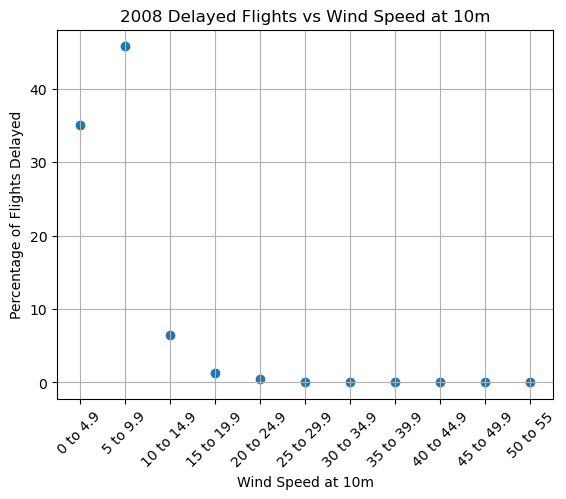

In [269]:
x_axis = delay_wind_10m_group_plot['Wind Speed at 10m Group']
y_axis = delay_wind_10m_group_plot['Percent']

plt.scatter(x_axis, y_axis, marker='o')
plt.xticks(x_axis, rotation=45)
plt.xlabel('Wind Speed at 10m')
plt.ylabel('Percentage of Flights Delayed')
plt.grid(True)
plt.title('2008 Delayed Flights vs Wind Speed at 10m')
plt.savefig('2008 Delayed Flights vs Wind Speed at 10m')
plt.show()

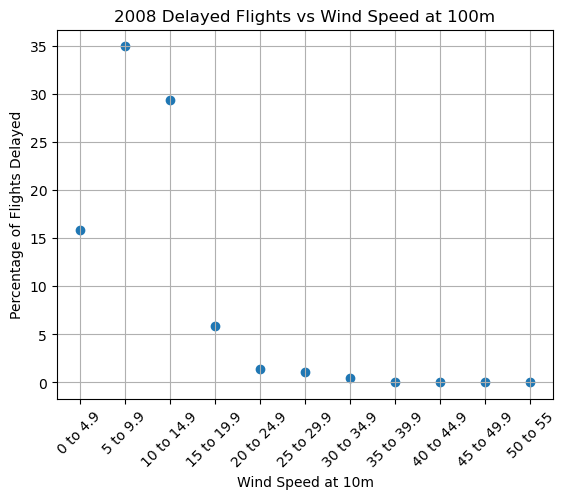

In [268]:
x_axis = delay_wind_100m_group_plot['Wind Speed at 100m Group']
y_axis = delay_wind_100m_group_plot['Percent']

plt.scatter(x_axis, y_axis, marker='o')
plt.xticks(x_axis, rotation=45)
plt.xlabel('Wind Speed at 10m')
plt.ylabel('Percentage of Flights Delayed')
plt.grid(True)
plt.title('2008 Delayed Flights vs Wind Speed at 100m')
plt.savefig('2008 Delayed Flights vs Wind Speed at 100m')
plt.show()

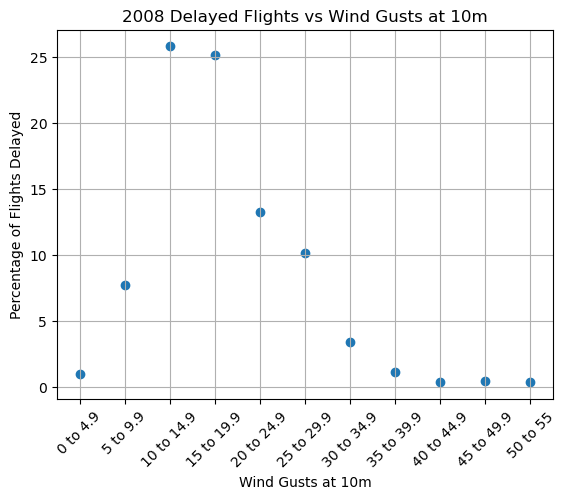

In [267]:
x_axis = delay_wind_gust_10m_group_plot['Wind Gusts at 10m Group']
y_axis = delay_wind_gust_10m_group_plot['Percent']

plt.scatter(x_axis, y_axis, marker='o')
plt.xticks(x_axis, rotation=45)
plt.xlabel('Wind Gusts at 10m')
plt.ylabel('Percentage of Flights Delayed')
plt.grid(True)
plt.title('2008 Delayed Flights vs Wind Gusts at 10m')
plt.savefig('2008 Delayed Flights vs Wind Gusts at 10m')
plt.show()